<a href="https://colab.research.google.com/github/Amaliastf/04-2141720228-MachineLearning-2023/blob/main/kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kuis 2

**Amalia Salsa Lutfiana**

**3F/04/21417200**

# Import Library

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [2]:
# import dataset minist
from tensorflow.keras.datasets import mnist

In [3]:
# Memuat data set dan mmebagi jadi 2 set untuk pelatihan dan pengujian
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# train_data.shape sebagai informasi ukuran data pelatihan
# test_data.shape sebagai informasi ukuran data pelatihan
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

**Penjelasan:**

Output : jumlah data, tinggi gambar, lebar gambar

Hasil : 60000, 28,28

60000 : jumlah data pelatihan

28 : tinggi gambar

28 : lebar gambar

In [5]:
# train_labels.shape merupakan ukuran label pelatihan
# test_labels.shape merupakan ukuran label pengujian
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

**Penjelasan:**

ukuran label data pelatihan : 60000

ukuran label data pengujian : 10000

In [6]:
# Melakukan pengecekkan dalam bentuk data gambar pertama (indeks ke-0)
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

**Penjelasan:**

tinggi gambar : 28

gambar: 28

In [7]:
# Melakukan pengecekan ukuran label pelatihan
# Check the label
train_labels.shape

(60000,)

### Combine Train and Test Data

In [8]:
# Melakukan penggabungan data dan label dari set data latih dan data uji
digits_data = np.vstack([train_data, test_data])

# Melakukan penggabungan secara horizontal
digits_labels = np.hstack([train_labels, test_labels])

In [9]:
# Melakukan pengcekkan ukuran data (digits_data) setelah dilakukan penggabungan
# Check data shape
digits_data.shape

(70000, 28, 28)

**Penjelasan:**

Dari penjumlahan 60000 data latih dan 10000 data uji menghasilkan ukuran data sebesar 70000

In [10]:
# Melakukan pengcekkan ukuran data label (digits_label) setelah dilakukan penggabungan
# Check label shape
digits_labels.shape

(70000,)

**Penjelasan:**

Dari penjumlahan 60000 label data latih dan 10000 label data uji menghasilkan ukuran data label sebesar 70000

Text(0.5, 1.0, 'Class: 9')

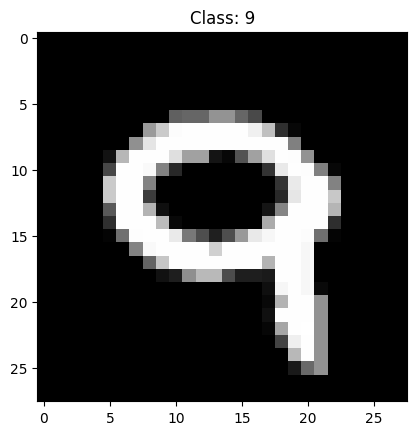

In [11]:
# Randomly checking the data

# Membuat indeks acak dari 0 sampe jumlah data dari digits_data
idx = np.random.randint(0, digits_data.shape[0])
# Menampilkan gambar dari hasil indeks acak
plt.imshow(digits_data[idx], cmap='gray')
# Mencetak judul
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

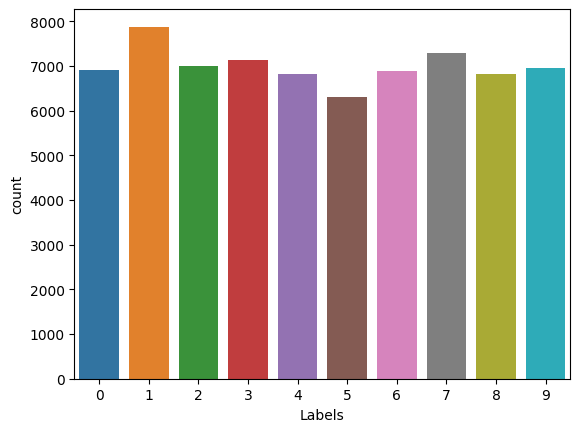

In [12]:
# Check data distribution

# Mengonversi array digits_labels dan kolom ini dinamai 'Lables'
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])

# Membuat countplot yang menunjukkan frekuensi setiap nilai unik
sns.countplot(df_labels, x='Labels')

**Penjelasan:**

Dari diagram diatas menunujukkan jumlah nilai unik pada setiap labelnya

## Load Kaggle A-Z

In [13]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-03 12:04:56--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   136MB/s    in 1.4s    

2023-12-03 12:04:58 (136 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [14]:
# Extract zip file

# Membaca file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')

# Mengekstrak file
zip_object.extractall('./')

# Menutup objek zip setelah selesai
zip_object.close()

In [15]:
# Mmembaca file CSV dan mengonversi nilai dalam dataframe jadi float
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

# Menampilkan dataset
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Get pixel data only

# Memisahkan data piksel dan menghapus kolom '0'
alphabet_data = dataset_az.drop('0', axis=1)

# Get labels only

# Memisahkan label dan mengambil kolom '0'
alphabet_labels = dataset_az['0']

In [17]:
# Check shape data

# Melakukan pengecekkan bentuk data kembali
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

**Penjelasan:**

Dataset berjumlah 372450 dengan 784 pixel. Sedangkan untuk label memiliki 372450 label.

In [18]:
# Check shape labels

# Melakukan pengecekkan bentuk label
alphabet_labels.shape

(372450,)

**Penjelasan:**

Jumlah label : 372450

In [19]:
# Reshape pixel data to 28*28

# Mengubah pixel gambar jadi 28*28 2dimensi
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

# Check the result by its shape

# Mengecek kembali stelah perubahan ukuran pixel
alphabet_data.shape

(372450, 28, 28)

**Penjelasan:**

Ukuran pixel berhasil berubah menjai 28 x 28 pixel

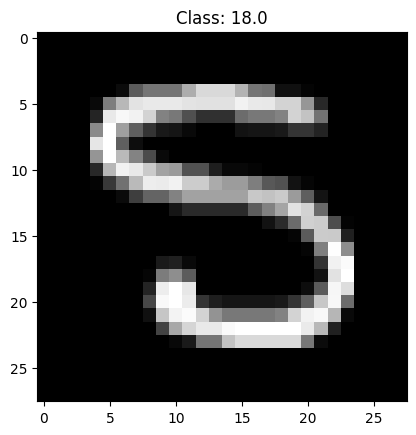

In [20]:
#Randomly checking A-Z dataset

# Membuat indeks acak
index = np.random.randint(0, alphabet_data.shape[0])

# Menampilkan gambar
plt.imshow(alphabet_data[index], cmap = 'gray')

# Menampilkan judul dengan nama label
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

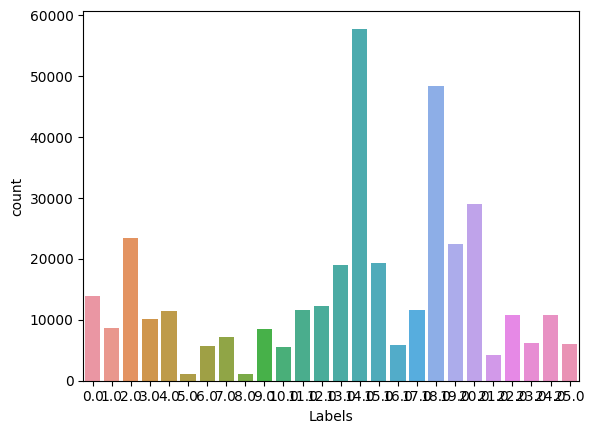

In [21]:
# Check data distribution

# Membuat dataframe baru dari label dataset A-Z
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})

# Membuat counplot untuk menunjukkan sebaran jumlah setiap karakter dataset
sns.countplot(df_az_labels, x='Labels')

Penjelasan:

Pada diagram diatas tampak frekuensi tiap karakter dalam dataset

## Combine Dataset (MNIST + Kaggel A-Z)

In [22]:
# Check unique value from digits_labels

# Mengambil nilai unik dari array dari digits-label
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
# Check unique value from alphabet_labels

# Mengambil nilai unik dari array alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [24]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

# Membuat label karakterA-Z dimulai dari nilai 10-35 agar bisa melanjutkan label digit
alphabet_labels += 10

In [25]:
# check alphabet labels again

# Melakukan pengecekkan ulang
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [26]:
# Combine both of them

# Menggabungkan data A-Z
data = np.vstack([alphabet_data, digits_data])

# Menggabungkan label A-Z
labels = np.hstack([alphabet_labels, digits_labels])

In [27]:
# Check the shape

# Mengecek bentuk ukuran data kemabli
data.shape, labels.shape

((442450, 28, 28), (442450,))

**Penjelasan:**

Data label yang semula berjumlah 372450 bertambah jumlahnya menjadi 442450

In [28]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [29]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [30]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data

# Menambahkan dimensi baru karen memebutuhkan data 3D
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

**Penjelasan:**

Terdapat 1 angka di belakang output yang menandakan dimensi sudah bertambah menjadi 3 Dimensi

# Preprocessing

In [31]:
# Normalize data

# Membagi data dengan 255 untuk konversi nilai pixel menjadi rentang 0-10
data /= 255.0

In [32]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

**Penjelasan:**

Bukti keberhasilan normalisasi berupa rentang pixel berada diantara 0 dan 1

In [33]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder

# Mengonversi label kelas menjadi biner
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [34]:
# Check labels shape
labels.shape

(442450, 36)

**Penjelasan:**

Terdapat 442450 sampel dan direpresentasikan deng panjang vektor 36

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

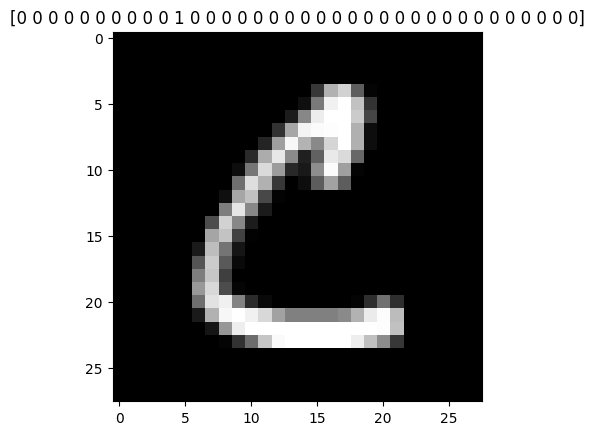

In [35]:
# Check data with label binarizer's label

# Menampilkan gambar dari indeks 30000
plt.imshow(data[30000].reshape(28,28), cmap='gray')

# Mencetak judul
plt.title(str(labels[0]))


In [36]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first

# Mengecek total jumlah tiap kelas dalam dataset
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [37]:
# Check the biggest value of data
# Mengecek data terbesar
classes_total.max()

57825

In [38]:
# Create a weight for each data

# Melakukan inisialisasi
classes_weights = {}
# Mengiterasi tiap kelas
for i in range(0, len(classes_total)):
  # print(i)

  # invers proporsional dengan jumlah sampel pada kelas tersebut, sehingga kelas dengan sampel yang lebih sedikit mendapatkan bobot yang lebih tinggi
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [40]:
# Import library

# Menghasilkan variasi gambar dari dataset asli
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
# Membuat objek image datagenerator pada rentang tertentu
augmentation = ImageDataGenerator(rotation_range = 10,
                                  zoom_range=0.05,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip = False)


# Build CNN Model

In [42]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [43]:
# Build the network

# Membuat objek Sequential untuk membangun model secara berurutan
network = Sequential()

# Menambahkan lapisan konvolusi pertama
network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# Menambahkan lapisan pooling
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan lapisan konvolusi kedua
network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))

# Menambahkan lapisan pooling kembali
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan lapisan konvolusi ketiga
network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))

# Menambahkan lapisan pooling kembali
network.add(MaxPool2D(pool_size=(2,2)))

# Meratakan output menjadi vektor satu dimensi
network.add(Flatten())

# Menambahkan lapisan Dense (fully connected)
network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

# Menambahkan lapisan output dengan fungsi aktivasi softmax
network.add(Dense(36, activation='softmax'))

# Mengompilasi model dengan fungsi kerugian, pengoptimal, dan metrik yang diinginkan
network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [44]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

**Penjelasan:**

Pada output diatas memberikan gambaran secara umum mengenai struktur dan kompleksitas model yang akan diperbarui selama pelatihan.

Pada model ini tedapat arsitekrut dasar CNN dengan 3 lapisan konvolusi.

Total Parameters: Menunjukkan jumlah total parameter yang dapat disesuaikan dalam model.

Trainable Parameters: Menunjukkan jumlah parameter yang dapat disesuaikan yang akan diperbarui selama pelatihan.

Non-trainable Parameters: Menunjukkan jumlah parameter yang tidak akan diperbarui selama pelatihan.

In [45]:
# Create actual labels

# Membuat daftar label yang sesuai
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [46]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [47]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [48]:
# Fit the model
# Melatih model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),# Generator augmented data
                      validation_data = (X_test, y_test),# Data validasi
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs, # Jumlah batch per epoch
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])# Menggunakan ModelCheckpoint untuk menyimpan model terbaik


Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.2708 - accuracy: 0.8189
Epoch 1: val_loss improved from inf to 0.26915, saving model to custom_ocr.model
2765/2765 [==============================] - 550s 198ms/step - loss: 2.2708 - accuracy: 0.8189 - val_loss: 0.2691 - val_accuracy: 0.8984
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 1.0047 - accuracy: 0.8992
Epoch 2: val_loss improved from 0.26915 to 0.19663, saving model to custom_ocr.model
2765/2765 [==============================] - 547s 198ms/step - loss: 1.0047 - accuracy: 0.8992 - val_loss: 0.1966 - val_accuracy: 0.9260
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8315 - accuracy: 0.9125
Epoch 3: val_loss did not improve from 0.19663
2765/2765 [==============================] - 543s 196ms/step - loss: 0.8315 - accuracy: 0.9125 - val_loss: 0.2224 - val_accuracy: 0.9028
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7416 - a

# Evaluate Model

## Make a Single Prediction

In [49]:
# make a prediction
# Membuat prediksi menggunakan model pada dataset pengujian
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 29s 42ms/step


In [50]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([9.0518681e-22, 1.1077594e-11, 1.7096338e-13, 8.0629158e-22,
       1.1796252e-17, 4.3729929e-14, 1.6594088e-21, 7.1782211e-17,
       1.4633037e-17, 5.5887269e-22, 1.0235566e-15, 6.8012185e-14,
       1.0352568e-11, 6.3706915e-11, 8.0384148e-13, 1.1641951e-14,
       8.5405539e-14, 1.7055618e-14, 9.9983454e-01, 1.6556484e-04,
       5.3382280e-17, 3.5579542e-09, 2.7319471e-23, 6.8195888e-21,
       3.1537571e-11, 8.2624326e-16, 7.8385984e-18, 8.9032506e-20,
       2.2149463e-10, 1.1167496e-08, 5.4140134e-14, 1.8245256e-24,
       9.9631350e-22, 1.0602272e-12, 6.6911315e-13, 1.0708562e-12],
      dtype=float32)

In [51]:
# Get the actual prediction -> highest probability
# Mengembalikan indeks kelas dengan nilai probabilitas tertinggi
np.argmax(predictions[1])

18

In [52]:
# Check label for 24
#cek label indeks 18
name_labels[18]

'I'

In [53]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
# check the highest value
np.argmax(y_test[1])

18

In [55]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [56]:
# Evaluate on test data

# Mengevaluasi model pada dataset pengujia
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 39s 14ms/step - loss: 0.1786 - accuracy: 0.9293


[0.17855456471443176, 0.9293253421783447]

In [57]:
# Print Classification Report
# print report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.26      0.81      0.40      1381
           1       0.96      0.99      0.98      1575
           2       0.88      0.98      0.93      1398
           3       0.95      0.99      0.97      1428
           4       0.92      0.97      0.95      1365
           5       0.52      0.96      0.67      1263
           6       0.96      0.98      0.97      1375
           7       0.96      0.98      0.97      1459
           8       0.90      0.99      0.95      1365
           9       0.98      0.97      0.98      1392
           A       0.99      0.99      0.99      2774
           B       1.00      0.96      0.98      1734
           C       0.99      0.99      0.99      4682
           D       0.90      0.97      0.93      2027
           E       0.99      0.99      0.99      2288
           F       0.96      0.99      0.98       233
           G       0.97      0.94      0.96      1152
           H       0.96    

**Penjelasan:**

Acuracy bernilai 91% berdasarkan report klasifikasi diatas

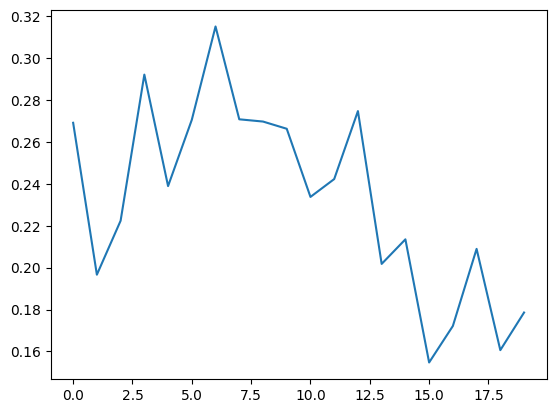

In [58]:
# Visualize loss value for each epoch

# Membuat plot nilai fungsi kerugian pada data validasi
plt.plot(history.history['val_loss'])

**Penjelasan:**

Tampak dari grafik diatas bahwa nilai fungsi kerugian pada data validasi lebih kecil dari pada akhir pelatihan dibandingkan awal, yang dapat diartikan bahwa model berhasil belajar dan menuingkatkan kinerjanya.

In [59]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

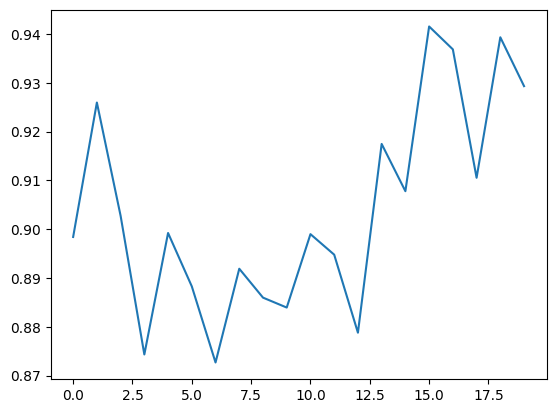

In [60]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

**Penjelasan:**

Tampak dari grafik diatas bahwa akurasi meningkat seiring waktu,dan menunjukkan model berhasil belajar dan meningkatkan kinerjanya pada data validasi.

# Save The Model

In [61]:
# The result will show in colab directory

# Menyimpan seluruh model ke dalam sebuah file
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [62]:
# Import library
from tensorflow.keras.models import load_model

In [63]:
# Load saved network
load_network = load_model('network')

In [64]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

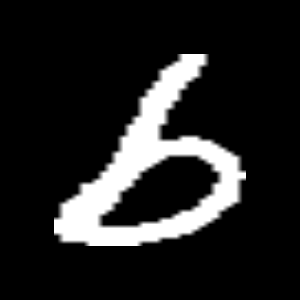

In [67]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

In [68]:
# Check shape
img.shape

(300, 300, 3)

In [69]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

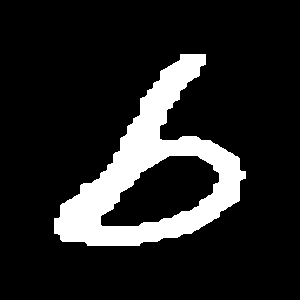

120.0


In [70]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [71]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [72]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [73]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [74]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 187ms/step


6

In [75]:
# check label for 6
name_labels[6]

'6'

**Penjelasan:**

Dengan melakukan pengolahan data pada kode diatas menggunakan model CNN dengan menggabungkan dataset MNIST dan Kaggle A-Z, Model akan dilatih dan dievaluasi untuk bisa digunakan untuk pengguanaan selanjutnya. Hasil dari model ini diujikan pada gambar diluar dari gambar yang ada pada dataset.

Pada tahap berikutnya model CNN digunakan untuk menguji gambar b_small.jpg dan menghasilkan nilai prediksi 6 sesuai dengan label ke-6 dalam daftar name_labels.